# Python translation of R code for econometrics II examples

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read in the data
df = pd.read_stata('https://data.nber.org/morg/annual/morg20.dta')

In [76]:
# remove all observations (rows) with at least one na value
df_ = df.dropna()

In [77]:
# select relevant columns
df_ = df[['uhourse','earnwke','sex','grade92','age']].copy()

In [78]:
# get the hourly wage (weekly wage / number of hours per week)
# drop values of > 50'000 / week
df_['wage'] = df_.earnwke/df.uhourse
df_ = df_[df_.wage < 50000].copy()

In [79]:
# select number of hours worked in a week > 10, aged between 25 and 65
df_ = df_.loc[(df.uhourse > 10) & (df.age > 24) & (df.age < 66)].copy()

In [80]:
# correct education to standard grade levels
edukey = {'31':0, '32':2.5, '33':5.5, '34':7.5, '35':9, '36':10, '37':11, '38':12,'39':12, '40':13, '41':14,'42':14,'43':16, '44':18,'45':18,'46':18}
df_.grade92 = df_.grade92.apply(lambda x: str(x))
mylist = []
for i in df_.grade92:
    try:
        a = edukey[i]
        mylist.append(a)
    except:
        a = 'NAN'
        mylist.append(a)

df_['edu_real'] = mylist


# combine all observations with less than 7.5 years education into one category.
def fix_the_ed(x):
    if (x <= 7.5):
        return 7.5
    else:
        return x
df_.edu_real = df_.edu_real.apply(lambda x: fix_the_ed(x))

In [81]:
grouped = df_.groupby(['sex','edu_real']).size()
size_men = len(df_[df_.sex == 1])
size_women = len(df_[df_.sex == 2])

In [82]:
# men and women frequencies
table_1=grouped.reset_index()
table_1 = table_1.pivot(index='sex',columns = 'edu_real')
table_1.columns = [x[1] for x in table_1.columns]
table_1.index = ['men','women']
table_1

,7.5,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0
men,1227,473,426,648,15355,7896,5773,13769,8153
women,676,289,303,417,11088,7348,6442,14786,9895


In [86]:
# in percentages
table_1_percent = (table_1.div(table_1.sum(axis=1), axis=0))*100
table_1_percent

,7.5,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0
men,2.284066,0.880491,0.793001,1.206255,28.583395,14.698436,10.746463,25.63105,15.176843
women,1.319179,0.563968,0.591289,0.813754,21.637655,14.339240,12.571228,28.85411,19.309578


In [71]:
## make histogram... to be continued

,uhourse,earnwke,sex,grade92,age,wage,edu_real
1,40.0,800.00,1,39,50,20.000000,12.0
14,35.0,387.50,2,39,26,11.071429,12.0
15,40.0,2269.23,1,39,44,56.730750,12.0
16,40.0,769.23,2,43,43,19.230750,16.0
18,50.0,1267.50,1,40,32,25.350000,13.0


In [67]:
sns.hist_plot()

In [62]:
table_1_percent = 

,7.5,9.0,10.0,11.0,12.0,13.0,14.0,16.0,18.0
sex,,,,,,,,,
1,1466,563,516,723,17437,8954,6510,15479,9161
2,733,310,315,443,11909,7972,6972,15969,10619


In [88]:
df_.reset_index(inplace=True, drop = False)

In [93]:
melted = df_.melt(id_vars=['sex','edu_real'],value_vars = 'wage')

<AxesSubplot:xlabel='edu_real', ylabel='Count'>

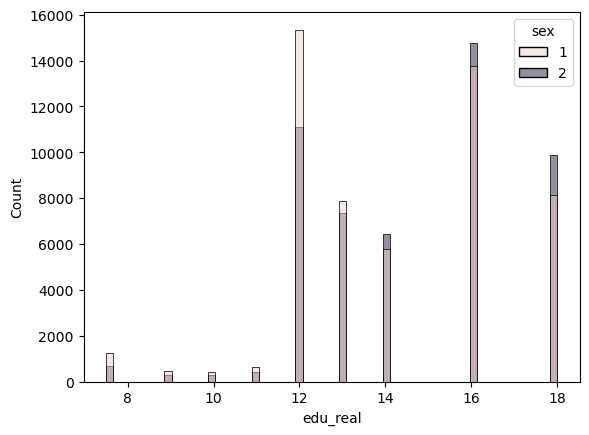

In [98]:
# histogran - need to look at output!
sns.histplot(data = melted,x = 'edu_real', hue = 'sex')